<a href="https://colab.research.google.com/github/Carnage203/ML/blob/main/SVM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

In [5]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [6]:
x

array([[ 0.02900841, -2.2837713 ],
       [-2.02217554,  1.51683837],
       [ 0.56761678, -2.19959322],
       ...,
       [-3.39716976, -0.30940324],
       [-1.17628692,  1.72961247],
       [ 1.14340272, -1.08164315]])

In [7]:
y

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [9]:
df=pd.DataFrame(x)

In [12]:
df

,0,1
0,0.029008,-2.283771
1,-2.022176,1.516838
2,0.567617,-2.199593
3,-1.513498,-0.599142
4,-1.636624,1.973209
...,...,...
995,1.379058,-0.730502
996,-1.201694,0.991364
997,-3.397170,-0.309403
998,-1.176287,1.729612


<Axes: xlabel='0', ylabel='1'>

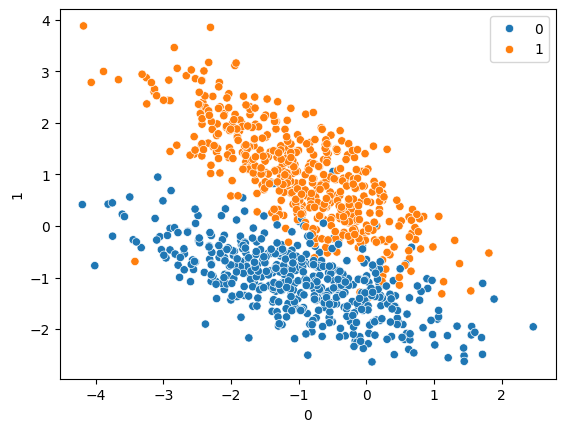

In [14]:
sns.scatterplot(x=df[0],
                y=df[1],
                hue=y)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [20]:
y_pred=svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       126
           1       0.95      0.98      0.97       124

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[120   6]
 [  2 122]]


Hyper Parameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1.0,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','sigmoid']}

In [30]:
grid = GridSearchCV(
    estimator=SVC(),             # Model to tune (SVM)
    param_grid=param_grid,       # Hyperparameters to test
    refit=True,                  # Train the model on the best parameters
    cv=5,                        # Use 5-fold cross-validation
    verbose=3                    # Print detailed progress
)

In [25]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=1.0, kernel=rbf;, score=0.947 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.753 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.733 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.760 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.680 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=1.0, kernel=sigmoid;, score=0.787 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [26]:
grid.best_params_

{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}

In [27]:
y_pred=grid.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       126
           1       0.97      0.98      0.98       124

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[122   4]
 [  2 122]]
